In [39]:
# Library and Personal Module Imports
import os
import re
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import src.modules.face_api as face_api

In [2]:
# Initialize a model to pass into future functions for fast vectorization.
model = face_api.init_model()

In [121]:
# Specify threshold strategy: default matthews_cc, least strict is balanced_acc, see face_api.py for more details
# Specify threshold strictness: 1 to 5 from most to least strict
# Specify maximum number of matches to return if distances are less than threshold, positive integer
threshold_strategy = 'balanced_acc'
threshold_strictness = 5
match_num = 3

In [122]:
# Specify reference directories for images and vectors to compare against.
# Specify number of digits as suffix for images
# reference_dir = './data/dummy_dataset/reference_images'
# vector_dir = './data/dummy_dataset/reference_vectors'
# num_digits = 4

reference_dir = './data/personal_images_batch2/reference_images'
vector_dir = './data/personal_images_batch2/reference_vectors'
num_digits = 2

vector_dict = face_api.load_vector_dict(vector_dir, num_digits = num_digits)

In [143]:
# Specify input image directory and name to check against.
# image_dir = './data/dummy_dataset/input_images'
# image_name = 'Wayne_Gretzky_0002.jpg'
# image_name = 'Sarah_Michelle_Gellar_0002.jpg'

image_dir = './data/personal_images_batch2/input_images'

# image_name = 'Jack-04.jpg'
# image_name = 'Adam-02.jpg'
# image_name = 'Ed-02.jpg'
# image_name = 'Dan1-02.jpg'

image_path = os.path.join(image_dir, image_name)

In [144]:
# Load in base image for inspection
base_image = cv2.imread(image_path)[:, :, ::-1]

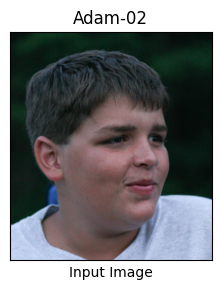

In [145]:
# Show base image
fig, ax = plt.subplots(figsize = (4, 3))

ax.imshow(base_image);

ax.set_title(f'{image_name.split(".")[0]}')
ax.set_xlabel('Input Image');
ax.set_xticks([]);
ax.set_yticks([]);
ax.grid(False);

plt.tight_layout();

In [146]:
# Perform Matching
match_details = face_api.find_image_match(image_path, vector_dict, model = model,
                                          threshold_strategy = threshold_strategy,
                                          threshold_strictness = threshold_strictness,
                                          match_num = match_num)

1/1 [==============================] - 0s 58ms/step


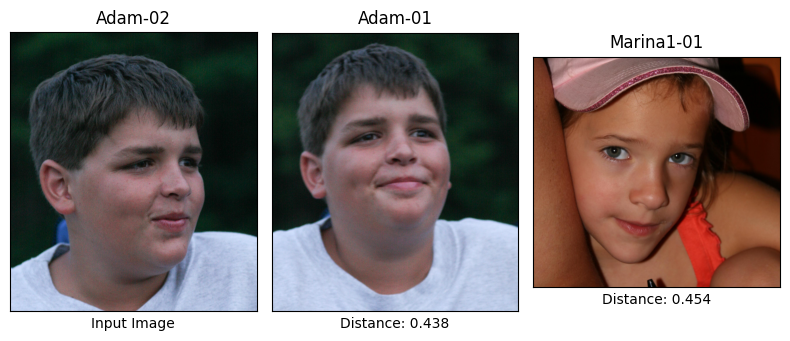

In [147]:
# If no matches are found, print match details, else show matches found
if type(match_details) == str:
    print(match_details)
else:
    # Display results
    
    # Split results into fields
    matches, threshold, metric = match_details
    
    # Number of subplots
    n = len(matches) + 1
    
    # Load matched images
    matched_images = [cv2.imread(os.path.join(reference_dir, x[0] + '.jpg'))[:, :, ::-1] for x in matches]

    # Create subplots for base image and all matched images
    fig, ax = plt.subplots(1, n, figsize = (round(n * 2.5), 4))
    
    # Display base image
    ax[0].imshow(base_image);
    ax[0].set_title(f'{image_name.split(".")[0]}');
    ax[0].set_xlabel('Input Image');
    
    # Turn off axis numbers
    for a in ax:
        a.set_xticks([]);
        a.set_yticks([]);
        a.grid(False);
    
    # Display matched images
    for i in range(len(matched_images)):
        ax[i + 1].imshow(matched_images[i]);
        ax[i + 1].set_title(f'{matches[i][0]}');
        ax[i + 1].set_xlabel(f'Distance: {matches[i][1]:.03f}');
    
    plt.tight_layout();